In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Python/AWD'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import sys

sys.path.append(root_path)

In [4]:
import os

import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import tensorflow as tf
from matplotlib import pyplot as plt

from src.datasets import MNISTDataSet
from src.models.adversarial import build_mnist_discriminator, build_mnist_generator, adversarial_fit
from src.utils.image import show_batch

In [5]:
mnist_df = pd.read_csv(os.path.join(root_path, "data/mnist/mnist-data-set.csv"))
mnist_df = mnist_df.loc[mnist_df["label"] == 8]
partial_mnist_data_set =  MNISTDataSet(mnist_df)

mnist_data_set = MNISTDataSet.from_csv(os.path.join(root_path, "data/mnist/mnist-data-set.csv"))

In [6]:
def build_generative_model(discriminator, generator):
    discriminator.trainable = False
    model = tf.keras.Sequential([generator, discriminator, ])
    
    adam = tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=adam)
 
    return model

In [7]:
generator = build_mnist_generator()
discriminator = build_mnist_discriminator()

generative_model = build_generative_model(discriminator, generator)

## Single Digit
Fit model for generating a single digit

In [11]:
adversarial_fit(model=generative_model, generator=generator, discriminator=discriminator, data_set=partial_mnist_data_set, latent_dim=100, epochs=40)

100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


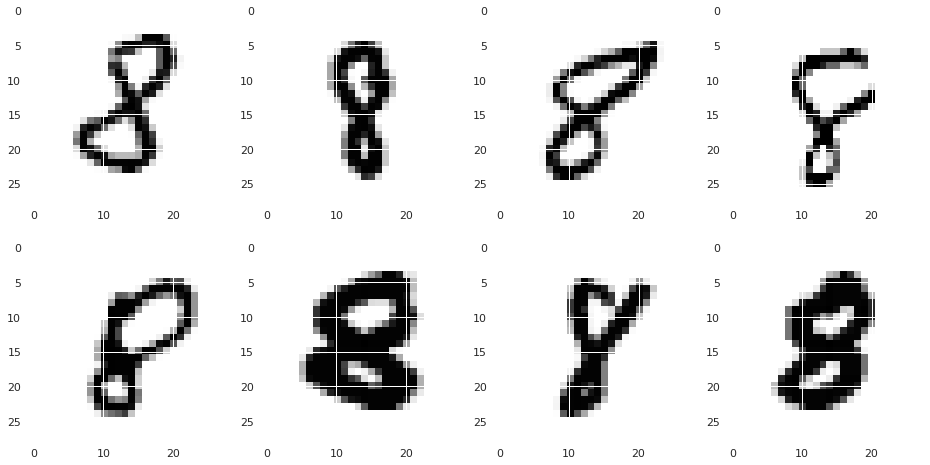

In [13]:
show_batch(partial_mnist_data_set.real_batch(size=8)[0])

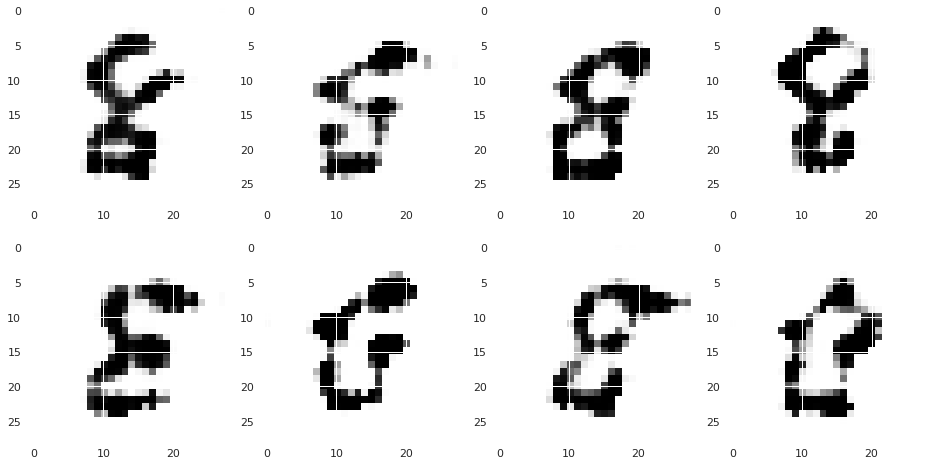

In [14]:
generated_batch = generator.predict(mnist_data_set.latent_batch(size=8, latent_dim=100))
show_batch(generated_batch)

## All Digits
Fit model on all digit data set

In [15]:
# Rebuild all models to "forget" previous training
generator = build_mnist_generator()
discriminator = build_mnist_discriminator()

generative_model = build_generative_model(discriminator, generator)

In [16]:
adversarial_fit(model=generative_model, generator=generator, discriminator=discriminator, data_set=mnist_data_set, latent_dim=100, epochs=160)

100%|██████████| 160/160 [37:59<00:00, 14.25s/it]


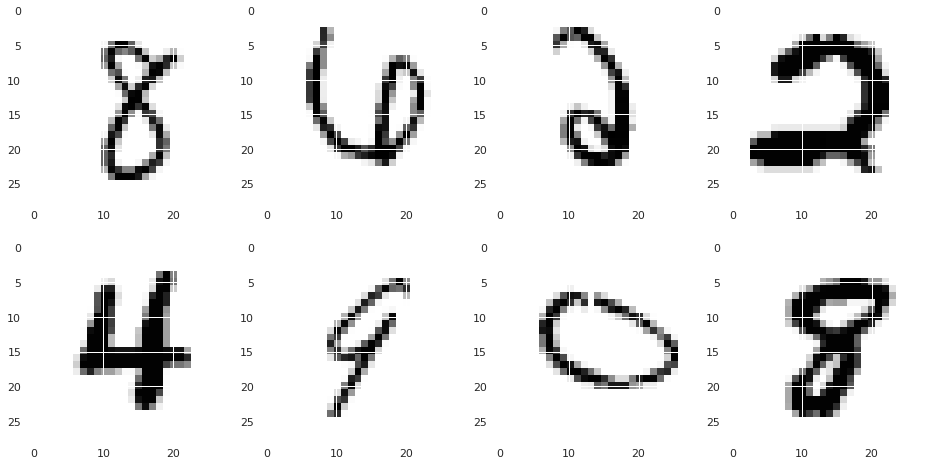

In [18]:
show_batch(mnist_data_set.real_batch(size=8)[0])

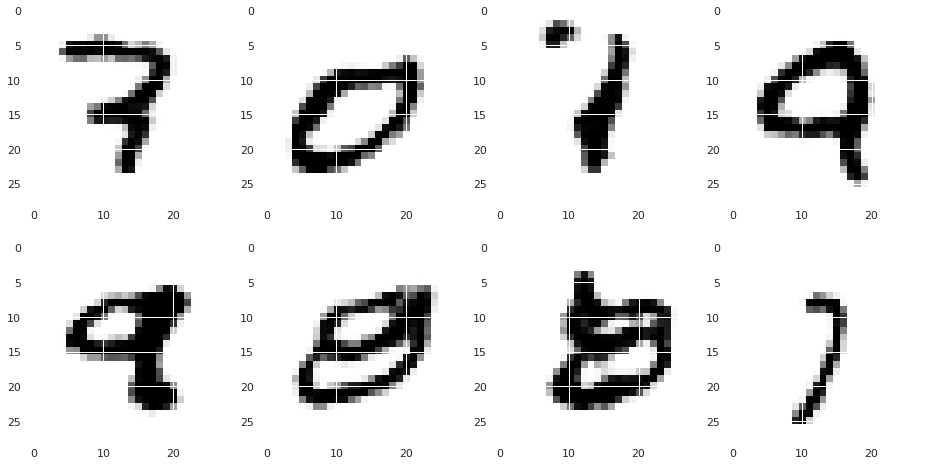

In [19]:
generated_batch = generator.predict(mnist_data_set.latent_batch(size=8, latent_dim=100))
show_batch(generated_batch)